# Exercise 1

#### Load module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

#### Load data

In [2]:
df = pd.read_csv("regression_nonlin.csv")

In [3]:
df.head(3)

X         y
0 -3.081771  3.181982
1 -2.976600  4.246223
2 -2.962131  3.723452

#### Inspect the data

In [4]:
df.dtypes # data types of the columsn

X    float64
y    float64
dtype: object

In [5]:
df.isnull().sum() # quick check of missing values for each column

X    0
y    0
dtype: int64

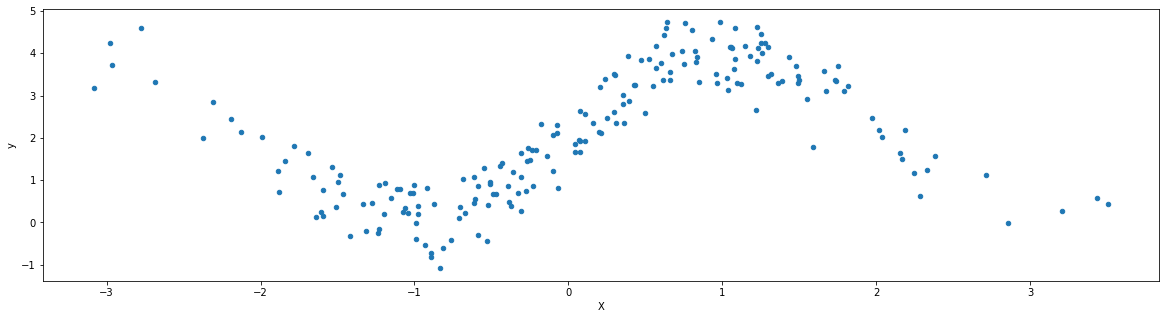

In [6]:
plt.rcParams["figure.figsize"] = (20,5)
df.plot(x='X', y='y', kind='scatter'); plt.show()

#### Split the data in train (60%), validation (20%) and test (20%)

In [7]:
test_size = 0.2; valid_size = 0.2; train_size = 0.6; train_temp_size = valid_size + train_size
# split in  temporarely train (80%), test (20 %) first 
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df.X.values, df.y.values, test_size=test_size, random_state=1,
                                                             shuffle=False)
# split in 20 % validation and 60 % train
X_train, X_validation, y_train, y_validation = train_test_split(X_train_temp, y_train_temp, 
                                                                test_size=(valid_size/train_temp_size), 
                                                                random_state=1, shuffle=False)

#### Verify that the split were correct

In [8]:
len(X_train)/len(df) == 0.6

True

In [9]:
len(X_validation)/len(df) == 0.2

True

In [10]:
len(X_test)/len(df) == 0.2

True

#### Fit a linear regression model to the data

In [11]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

##### Fit data on training data points and compute the mean square error

In [12]:
y_train_predict = regressor.predict(X_train.reshape(-1,1))

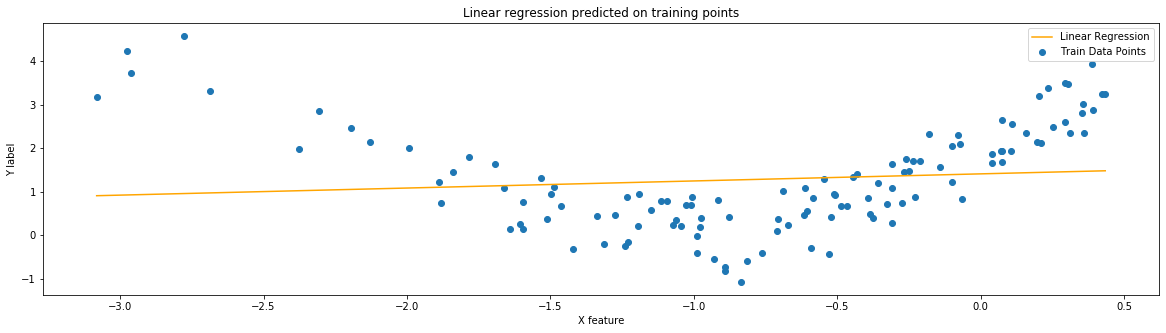

In [13]:
plt.plot(X_train, y_train_predict, color='orange')
plt.scatter(X_train, y_train)
plt.legend(['Linear Regression', 'Train Data Points'])
plt.title("Linear regression predicted on training points")
plt.xlabel('X feature')
plt.ylabel('Y label')
plt.show()

In [14]:
mse_training = mean_squared_error(y_train, y_train_predict)
print(f'Mean square error on training points is {mse_training}')

Mean square error on training points is 1.375634700258637


##### Fit data model on validation data points and compute the mean square error

In [15]:
y_validation_predict = regressor.predict(X_validation.reshape(-1,1))

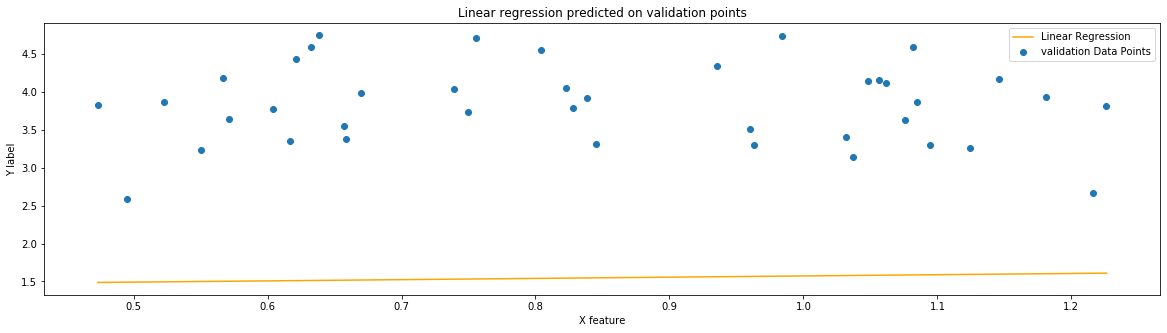

In [16]:
plt.plot(X_validation, y_validation_predict, color='orange')
plt.scatter(X_validation, y_validation)
plt.legend(['Linear Regression', 'validation Data Points'])
plt.title("Linear regression predicted on validation points")
plt.xlabel('X feature')
plt.ylabel('Y label')
plt.show()

In [17]:
mse_validation = mean_squared_error(y_validation, y_validation_predict)
print(f'Mean square error on training points is {mse_validation}')

Mean square error on training points is 5.514498000708412


#### Fit a polynomial regression

In [18]:
def plot_polynomial_regression(model, X, y, title):
    degrees = [2,5,10,20,25]; MSE = []
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        model.fit(X_poly, y)
        y_poly_predict = model.predict(X_poly)
        plt.plot(X, y_poly_predict)
        mse = mean_squared_error(y, y_poly_predict)
        mse = round(mse, 2)
        MSE.append(mse)
    
    plt.scatter(X, y)

    plt.legend([f' Polynomial degree {degree}. MSE: {mse}' for degree, mse in zip(degrees, MSE)])

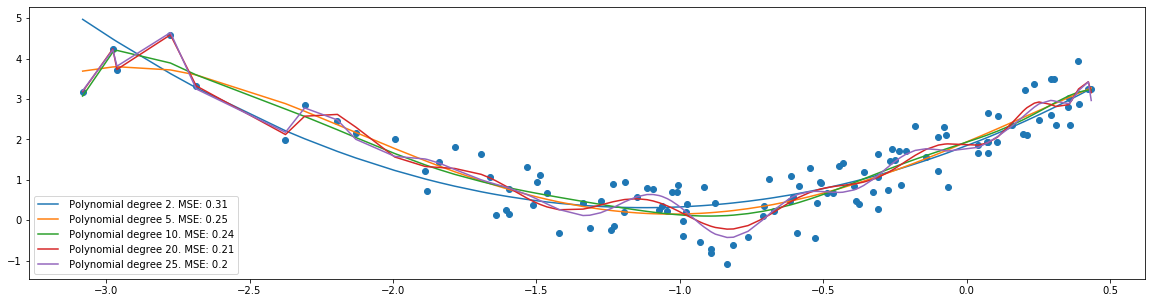

In [19]:
model = regressor; X = X_train.reshape(-1,1); y = y_train
title = "Polynomial regression for training points"
plot_polynomial_regression(model, X, y, title)

#### Evaluatiing models on test data points

In [20]:
def evaluate_model(model, X_train, y_train, X_validation, y_validation, X_test, y_test):
    degrees = [2,5,10,20,25]; score = {}; container = {}
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_valid_poly = poly.fit_transform(X_validation)
        X_test_poly = poly.fit_transform(X_test)
        model.fit(X_train_poly, y_train)
        y_train_predict = model.predict(X_train_poly)
        y_test_predict = model.predict(X_test_poly)
        y_valid_predict = model.predict(X_valid_poly)
        mse_train = round(mean_squared_error(y_train, y_train_predict), 2)
        mse_test = round(mean_squared_error(y_test, y_test_predict), 2)
        mse_valid = round(mean_squared_error(y_validation, y_valid_predict), 2)
    
        score['train_score'] = mse_train
        score['validation_score'] = mse_valid
        score['test_score'] = mse_test
        container[degree] = score
        score = {}
    return container

In [21]:
X_train = X_train.reshape(-1,1)
X_validation = X_validation.reshape(-1,1)
X_test = X_test.reshape(-1,1)
evaluation = evaluate_model(model, X_train, y_train, X_validation, y_validation, X_test, y_test)
evaluation

{2: {'train_score': 0.31, 'validation_score': 3.11, 'test_score': 115.35},
 5: {'train_score': 0.25, 'validation_score': 0.58, 'test_score': 56.6},
 10: {'train_score': 0.24,
  'validation_score': 14410.57,
  'test_score': 27001197593.34},
 20: {'train_score': 0.21,
  'validation_score': 2816414517282.22,
  'test_score': 1.2630190841881203e+25},
 25: {'train_score': 0.2,
  'validation_score': 1801792874887566.8,
  'test_score': 1.319456905645104e+29}}

In [22]:
df_score = pd.DataFrame(evaluation)
df_score

2      5             10            20            25
train_score         0.31   0.25  2.400000e-01  2.100000e-01  2.000000e-01
validation_score    3.11   0.58  1.441057e+04  2.816415e+12  1.801793e+15
test_score        115.35  56.60  2.700120e+10  1.263019e+25  1.319457e+29

#### The best performing model on the validation set is the one with degree 5. It also perform best on the test set

# Exercise 2

In [26]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

In [41]:
test_size = 0.2; valid_size = 0.2; train_size = 0.6; train_temp_size = valid_size + train_size
# split in  temporarely train (80%), test (20 %) first 
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=1,
                                                             shuffle=False)
# split in 20 % validation and 60 % train
X_train, X_validation, y_train, y_validation = train_test_split(X_train_temp, y_train_temp, 
                                                                test_size=(valid_size/train_temp_size), 
                                                                random_state=1, shuffle=True)

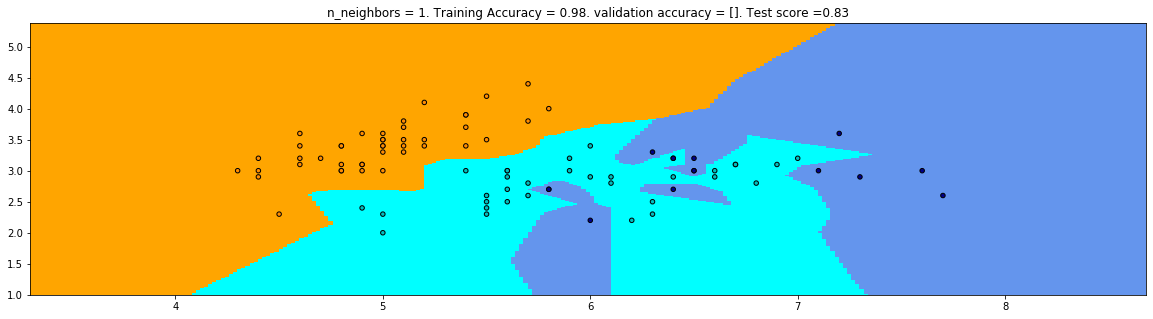

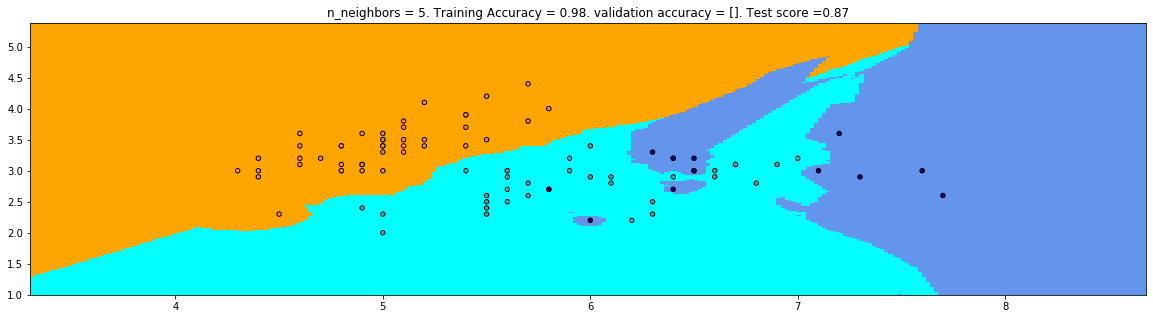

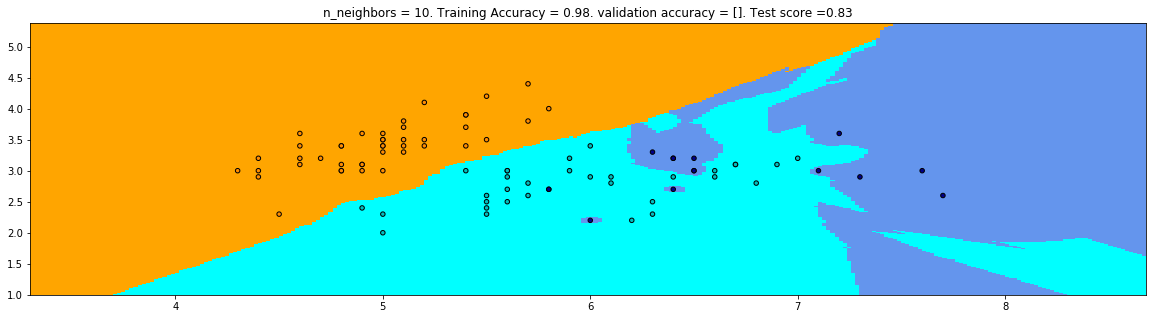

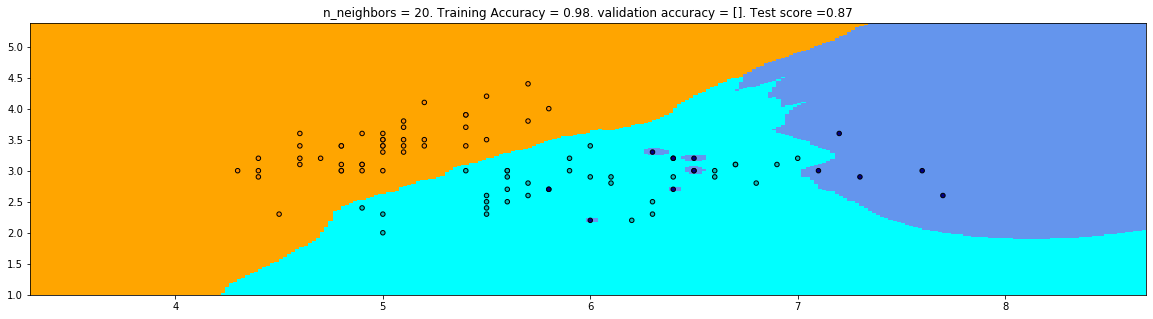

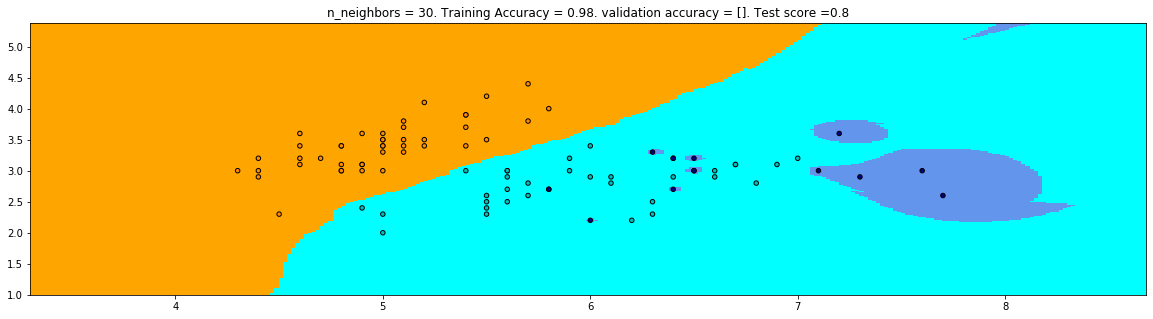

In [49]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
scores = []
train_scores1 = []
test_scores1 = []
valid_scores1 = []
for n_neighbors in [1,5,10,20,30]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    clf.fit(X_train, y_train)
    train_score1 = round(clf.score(X_train, y_train), 2)
    valid_score1 = round(clf.score(X_validation, y_validation), 2)
    test_score1 = round(clf.score(X_test, y_test), 2)
    
    train_scores1.append(train_score1)
    test_scores1.append(test_score1)
    valid_scores1.append(valid_score1)
    
    h = 0.02
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.title(f'n_neighbors = {n_neighbors}. Training Accuracy = {train_score1}. validation accuracy = {valid_score}. Test score ={test_score1}')

plt.show()

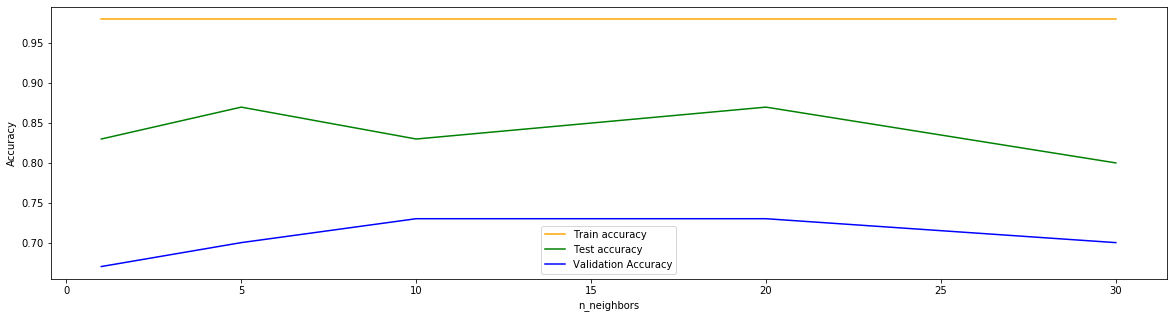

In [50]:
[1,5,10,20,30]
plt.plot(N, train_scores1, color='orange')
plt.plot(N, test_scores1, color='green')
plt.plot(N, valid_scores1, color='blue')
plt.legend(['Train accuracy','Test accuracy', 'Validation Accuracy'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

#### This basic model does not generalise at all and is useless :). This is due to the fact that the training data is two small. Let just split the data in 80% training and 20% test. This should increase the test score

In [43]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1,
                                                             shuffle=True)

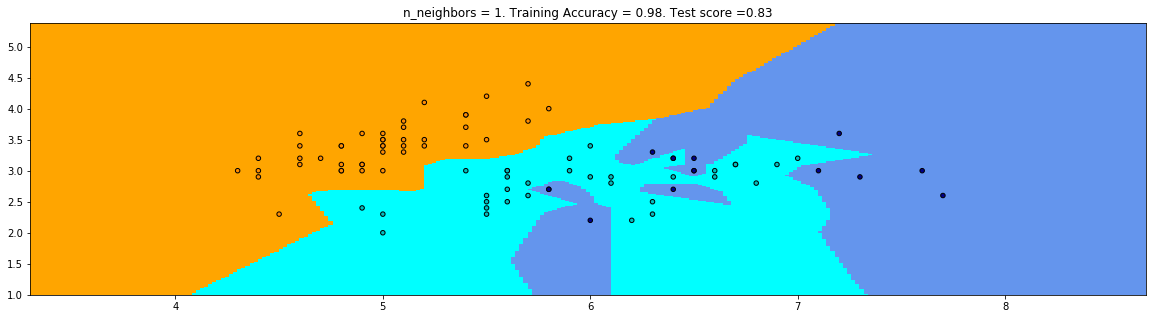

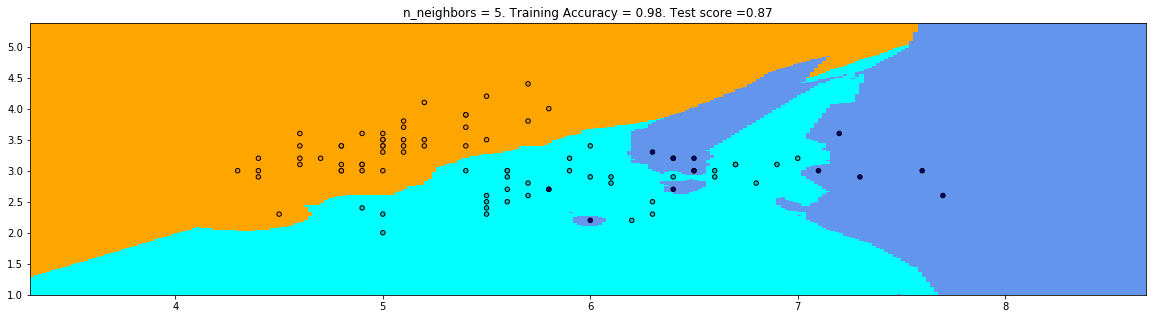

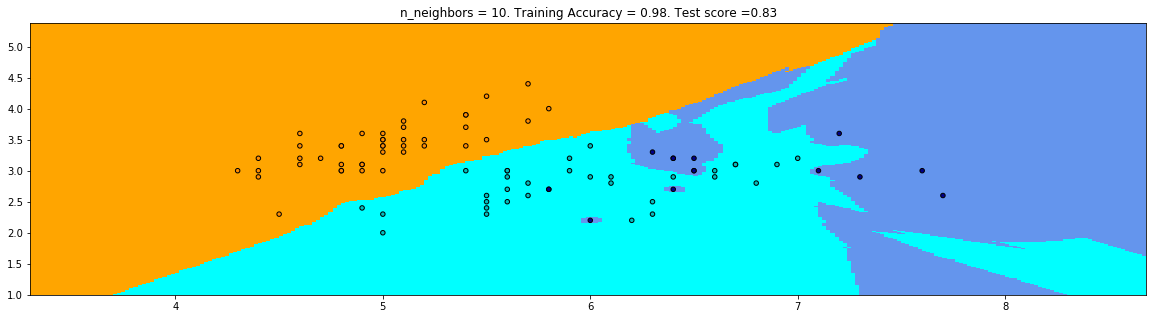

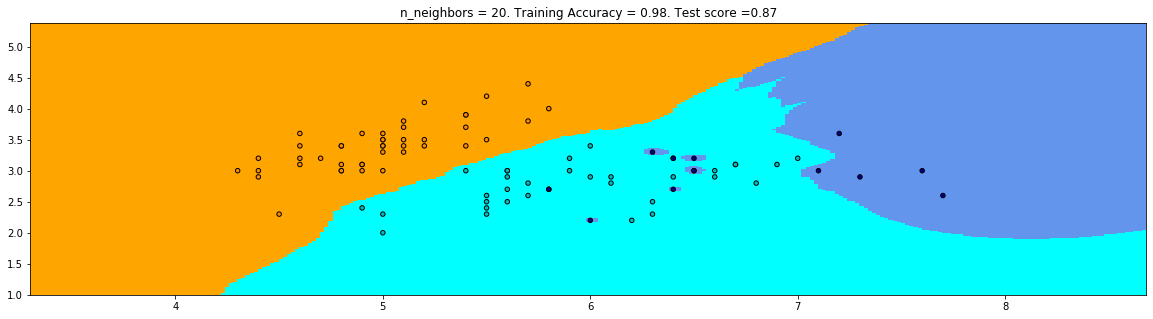

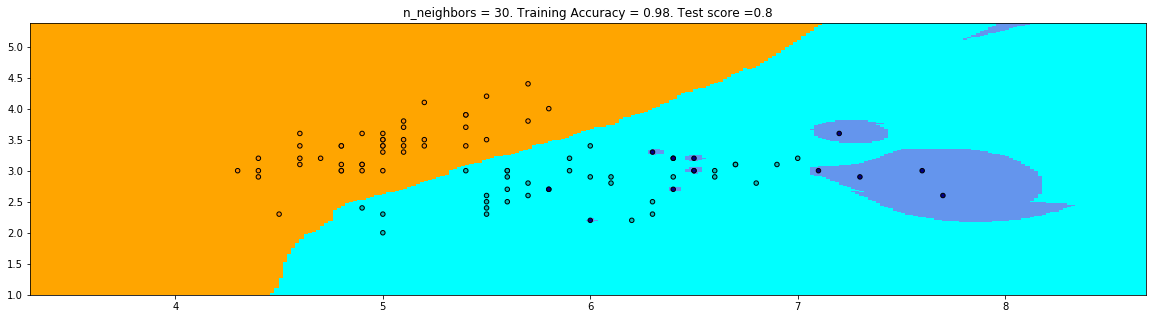

In [53]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
train_scores = []
test_scores = []
N = [1,5,10,20,30]
for n_neighbors in N:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    clf.fit(X_train, y_train)
    train_score = round(clf.score(X_train, y_train), 2)
    test_score = round(clf.score(X_test, y_test), 2)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    h = 0.02
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.title(f'n_neighbors = {n_neighbors}. Training Accuracy = {train_score}. Test score ={test_score}')
plt.show()

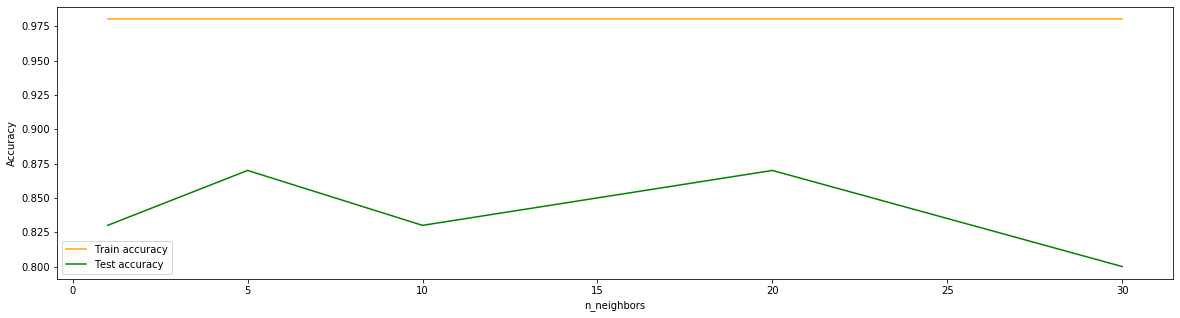

In [54]:
plt.plot(N, train_scores, color='orange')
plt.plot(N, test_scores, color='green')
plt.legend(['Train accuracy','Test accuracy'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()